### Import bibliotheque:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.stats as kstest

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

### Read data:

In [2]:
datasets = {}
datanames = ['olist_customers' , 'olist_geolocation','olist_order_items','olist_order_payments',
            'olist_order_reviews','olist_orders','olist_products','olist_sellers']

for name in datanames:
    datasets[name] = pd.read_csv(name +'_'+'dataset.csv')

datasets['product_category'] = pd.read_csv('product_category_name_translation.csv')

#### 1 - Olist_customers:

In [3]:
customers = datasets['olist_customers']
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


* customer_id : Clé dans le dataset des commandes
* customer_unique_id : Identifiant unique du client
* customer_state : Etat du client

In [4]:
customers['customer_id']

0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object

In [5]:
print(f"shape_of_customers = {customers.shape}",'\n') 
print(f" {customers.info()}",'\n')
print(f"columns of customs:{customers.columns.tolist()}",'\n')



shape_of_customers = (99441, 5) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
 None 

columns of customs:['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state'] 



In [6]:
customers['customer_city'].nunique()

4119

customers_city : 
* 4119 unique values : 

In [7]:
# number of unique value of state:
customers['customer_state'].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

Text(0.5, 1.0, 'states')

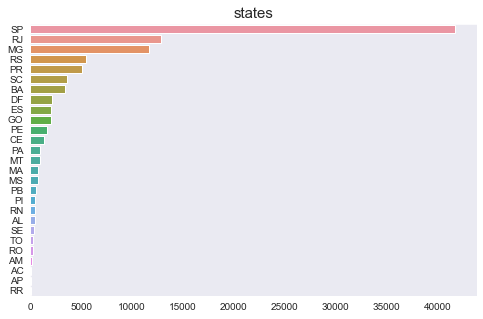

In [8]:
counts = customers['customer_state'].value_counts()
fig=plt.figure(figsize=(8,5))
sns.set_style("dark")
sns.barplot(y=counts.index, x=counts.values)
plt.title('states',fontsize=15)

In [9]:
customers.isna().sum()
# aucune données manquante.

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

### 2 - Olist_geolocation:

In [10]:
# read data:
geolocation = datasets['olist_geolocation']
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
print(f"shape_of_customers = {geolocation.shape}",'\n') 
print(f" {geolocation.info()}",'\n')
print(f"columns of customs:{geolocation.columns.tolist()}",'\n')

shape_of_customers = (1000163, 5) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
 None 

columns of customs:['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state'] 



In [12]:
geolocation['geolocation_city'].nunique()

8011

* 8011 cities , contrairement au dataframe customers avec 4119

In [13]:
# on regarde les valeurs nulles dans dataset olist_geolocation:
geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [14]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [15]:
geolocation["geolocation_lat"].groupby(by=geolocation['geolocation_zip_code_prefix']).mean()

geolocation_zip_code_prefix
1001    -23.550190
1002    -23.548146
1003    -23.548994
1004    -23.549799
1005    -23.549456
           ...    
99960   -27.953722
99965   -28.183372
99970   -28.343766
99980   -28.389129
99990   -28.329595
Name: geolocation_lat, Length: 19015, dtype: float64

In [16]:
geolocation["geolocation_lng"].groupby(by=geolocation['geolocation_zip_code_prefix']).mean()

geolocation_zip_code_prefix
1001    -46.634024
1002    -46.634979
1003    -46.635731
1004    -46.634757
1005    -46.636733
           ...    
99960   -52.025511
99965   -52.039850
99970   -51.874689
99980   -51.843836
99990   -51.769362
Name: geolocation_lng, Length: 19015, dtype: float64

In [17]:
zip_code= list(set(geolocation["geolocation_zip_code_prefix"]))
len(zip_code)

19015

In [18]:
for i in zip_code :
    geolocation.loc[(geolocation["geolocation_zip_code_prefix"]==i),"geolocation_lat"]= geolocation["geolocation_lat"].groupby(by=geolocation['geolocation_zip_code_prefix']).mean()[i]
    geolocation.loc[(geolocation["geolocation_zip_code_prefix"]==i),"geolocation_lng"]= geolocation["geolocation_lng"].groupby(by=geolocation['geolocation_zip_code_prefix']).mean()[i]
    

In [19]:
geolocation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545411,-46.638924,sao paulo,SP
1,1046,-23.545930,-46.643998,sao paulo,SP


In [20]:
geolocation.shape

(1000163, 5)

In [21]:
geolocation.duplicated(subset = "geolocation_zip_code_prefix",keep=False).sum()

999120

In [22]:
geolocation_tab = geolocation.drop_duplicates(subset="geolocation_zip_code_prefix")
geolocation_tab.shape

(19015, 5)

###3)- olist_order_items:

In [23]:
order_items = datasets['olist_order_items']
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


* Variables importantes du dataset regroupant les lignes de commande :

- order_id : Identifiant unique de la commande
- order_item_id : Identifiant séquentiel des items d'une même commande (lignes de commande)
- product_id : Identifiant unique du produit
- seller_id : Identifiant unique du vendeur
- price : Prix de la ligne de commande
- freight_value : Coût de fret de la ligne (Si plusieurs lignes, le coût de fret est réparti entre toutes les lignes)

In [24]:
print(f"shape_of_customers = {order_items.shape}",'\n') 
print(f" {order_items.info()}",'\n')
print(f"columns of customs:{order_items.columns.tolist()}",'\n')

shape_of_customers = (112650, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
 None 

columns of customs:['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value'] 



In [25]:
# Trouver les valeurs manquantes:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

* order_item_id : Le nombres d'article inclus dans la meme commande 
 * on voit une variation entre 1 et 21.

In [26]:
order_items.order_item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

In [27]:
# Tansformer la colonne shipping_limit_date en datetime:
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])


In [28]:
order_items[['order_id','order_item_id']].value_counts()

order_id                          order_item_id
00010242fe8c5a6d1ba2dd792cb16214  1                1
ab114f47094abcacaf5888844db683ff  1                1
ab14fdcfbe524636d65ee38360e22ce8  4                1
                                  3                1
                                  2                1
                                                  ..
553a1f1b74cf15fe6cb4a01a627ab41f  1                1
553a0f2feba6fd288aaea2986ca2f94a  1                1
5539bd029cf95d97ba8f51f6f323c839  1                1
553901a853048dcd33ec8de19f90c5d0  1                1
fffe41c64501cc87c801fd61db3f6244  1                1
Length: 112650, dtype: int64

In [29]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### 4) olist_order_payements:

In [30]:
# read data :
order_payment = datasets['olist_order_payments']
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [31]:
print(f"shape_of_data_payement = {order_payment.shape}",'\n') 
print(f" {order_payment.info()}",'\n')
print(f"columns of payement:{order_payment.columns.tolist()}",'\n')

shape_of_data_payement = (103886, 5) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
 None 

columns of payement:['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value'] 



In [32]:
# Les valeurs nulles:
order_payment.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [33]:
# Les valeurs uniques pour la colonne (type de payement):
order_payment['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [34]:
order_payment['payment_installments'].unique()

array([ 8,  1,  2,  3,  6,  5,  4, 10,  7, 12,  9, 13, 15, 24, 11, 18, 14,
       20, 21, 17, 22,  0, 16, 23], dtype=int64)

In [35]:
nutrigrades = order_payment.groupby(by='order_id')['payment_type'].nunique().sort_values(ascending=False).sort_index()

([<matplotlib.patches.Wedge at 0x1cb6eeab490>,
 [Text(-0.7715271952531725, 0.825618426989595, 'credit_card'),
  Text(0.5667523223854735, -0.9660185324675052, 'boleto'),
  Text(1.0802266347716698, -0.29582159747028874, 'voucher'),
  Text(1.118793546102179, -0.05197115738668372, 'debit_card'),
  Text(1.119999995400592, -0.00010150209023112264, 'not_defined')])

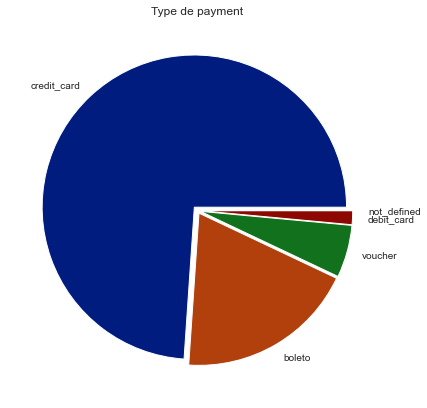

In [36]:
payment_type = order_payment['payment_type'].value_counts()
explode  = [0.03 , 0.02, 0.02, 0.02 , 0.02]
plt.figure(figsize = (8,7))
palette_color = sns.color_palette('dark')
plt.title('Type de payment')
plt.pie(payment_type,labels=order_payment['payment_type'].unique(),colors = palette_color,explode=explode)

In [37]:
order_payment[["order_id","payment_installments","payment_type"]].value_counts()

order_id                          payment_installments  payment_type
fa65dad1b0e818e3ccc5cb0e39231352  1                     voucher         29
ccf804e764ed5650cd8759557269dc13  1                     voucher         25
895ab968e7bb0d5659d16cd74cd1650c  1                     voucher         21
285c2e15bebd4ac83635ccc563dc71f4  1                     voucher         21
ee9ca989fc93ba09a6eddc250ce01742  1                     voucher         18
                                                                        ..
55b0d8973155b2b01e1849cd54bb8d89  1                     boleto           1
55af89bd3634844abc96b00c4caa76a5  4                     credit_card      1
55af3f02d418fbfae46c0e04bffe4676  1                     boleto           1
55aeba08a7d54fd54220244c4dfdb559  1                     credit_card      1
fffe41c64501cc87c801fd61db3f6244  1                     credit_card      1
Length: 101836, dtype: int64

### 5 - olist_order_review:

In [38]:
order_review = datasets['olist_order_reviews']
order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Text(0.5, 1.0, 'La répartition de score attribuées aux commandes')

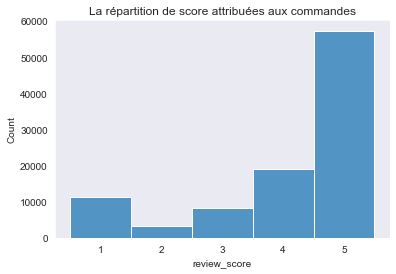

In [39]:
sns.histplot(data = order_review , x = 'review_score', discrete=True,)
plt.title('La répartition de score attribuées aux commandes')

In [40]:
print(f"shape_of_order_review = {order_review.shape}",'\n') 
print(f" {order_review.info()}",'\n')
print(f"columns of order_review:{order_review.columns.tolist()}",'\n')

shape_of_order_review = (99224, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
 None 

columns of order_review:['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'] 



In [41]:
# Les valeurs manquantes:
order_review.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [42]:
# Transformer les colonnes creation_date et timestamp en datetime:
date = ['review_creation_date','review_answer_timestamp']
for i in date:
    order_review[i] = pd.to_datetime(order_review[i])

In [43]:
order_review.describe(include = 'all')

C:\Users\Lynda\AppData\Local\Temp\ipykernel_18040\453244233.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_review.describe(include = 'all')
C:\Users\Lynda\AppData\Local\Temp\ipykernel_18040\453244233.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_review.describe(include = 'all')


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
first,NaN,NaN,NaN,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,NaN,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN


In [44]:
# on regarde les données dupliquée entre review_id et order_id:
order_review[['order_id','review_id']].duplicated().sum()

0

### 5 - olist_orders :

In [45]:
olist_orders = datasets['olist_orders']
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [46]:
olist_orders['customer_id'].value_counts()

9ef432eb6251297304e76186b10a928d    1
413f7e58270a32396af030a075b924be    1
eb4350b67a0264c67e5e06a038e4afbb    1
622b07d262d545d16efbd4363a89cb91    1
c701fbfa77791abd05eef9eacf7ea7a8    1
                                   ..
39585f08d13377e50fde35467984e6eb    1
eb3d995301c320683de629f5b4dd0c78    1
f2507ea56d748a23037bb1214964e87d    1
ae8269d850cd3a3d06a56877c450b3f8    1
edb027a75a1449115f6b43211ae02a24    1
Name: customer_id, Length: 99441, dtype: int64

In [47]:
print(f"shape_of_orders = {olist_orders.shape}",'\n') 
print(f" {olist_orders.info()}",'\n')
print(f"columns of olist_orders:{olist_orders.columns.tolist()}",'\n')

shape_of_orders = (99441, 8) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
 None 

columns of olist_orders:['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'] 



In [48]:
olist_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [49]:
# Transformer les colonnes en datetime:
for columns in olist_orders.loc[: , 'order_purchase_timestamp' : 'order_estimated_delivery_date'].columns:
    olist_orders[columns] = pd.to_datetime(olist_orders[columns])

In [50]:
olist_orders.describe(include = 'all')

C:\Users\Lynda\AppData\Local\Temp\ipykernel_18040\305993324.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  olist_orders.describe(include = 'all')
C:\Users\Lynda\AppData\Local\Temp\ipykernel_18040\305993324.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  olist_orders.describe(include = 'all')
C:\Users\Lynda\AppData\Local\Temp\ipykernel_18040\305993324.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


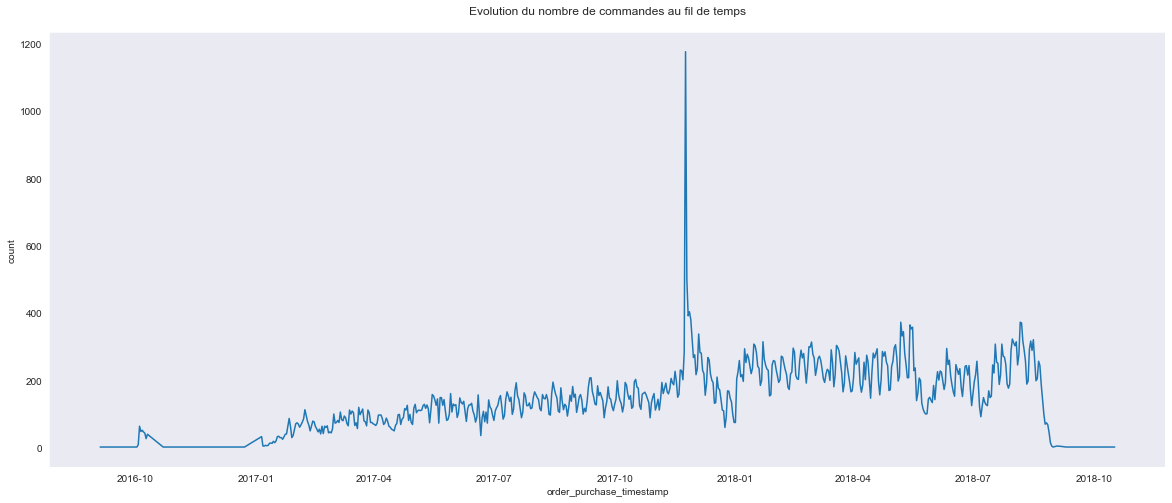

In [51]:
orders_per_days = olist_orders.groupby(olist_orders["order_purchase_timestamp"]\
                                      .astype('datetime64[ns]').dt.date)\
                                    .count()["order_id"]
fig = plt.figure(figsize=(20, 8))
ax = orders_per_days.plot()
ax.set_ylabel("count")
plt.title(f"Evolution du nombre de commandes au fil de temps\n")
plt.show()

In [52]:
colum = ['order_status','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date',
         'order_delivered_customer_date','order_estimated_delivery_date']

olist_orders.groupby('order_status',dropna = False).count()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_status,,,,,,,
approved,2,2,2,2,0,0,2
canceled,625,625,625,484,75,6,625
created,5,5,5,0,0,0,5
delivered,96478,96478,96478,96464,96476,96470,96478
invoiced,314,314,314,314,0,0,314
processing,301,301,301,301,0,0,301
shipped,1107,1107,1107,1107,1107,0,1107
unavailable,609,609,609,609,0,0,609


### 7) olist_products : 

In [53]:
products = datasets['olist_products']
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [54]:
print(f"shape_of_products = {products.shape}",'\n') 
print(f" {products.info()}",'\n')
print(f"columns of products:{products.columns.tolist()}",'\n')

shape_of_products = (32951, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
 None 

columns of products:['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_c

In [55]:
products['product_category_name'].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

In [56]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### 8 - olist_sellers_datasets:

In [57]:
sellers = datasets['olist_sellers']
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [58]:
print(f"shape_of_sellers = {sellers.shape}",'\n') 
print(f" {sellers.info()}",'\n')
print(f"columns of products:{sellers.columns.tolist()}",'\n')

shape_of_sellers = (3095, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
 None 

columns of products:['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'] 



In [59]:
# valeurs manquantes:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [60]:
print(f" {sellers['seller_state'].unique()},nombre de valeurs sellers est :{sellers['seller_state'].nunique()}")

 ['SP' 'RJ' 'PE' 'PR' 'GO' 'SC' 'BA' 'DF' 'RS' 'MG' 'RN' 'MT' 'CE' 'PB'
 'AC' 'ES' 'RO' 'PI' 'MS' 'SE' 'MA' 'AM' 'PA'],nombre de valeurs sellers est :23


In [61]:
sellers.describe(include = 'all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


### 9-  product_category:

In [62]:
category = datasets['product_category']
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [63]:
category.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [64]:
print(f"shape_of_product_category = {sellers.shape}",'\n') 
print(f" {category.info()}",'\n')
print(f"columns of product_category:{category.columns.tolist()}",'\n')

shape_of_product_category = (3095, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
 None 

columns of product_category:['product_category_name', 'product_category_name_english'] 



In [65]:
category.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### 2- Nettoyage et exploration:


### 2.1 Creation de RFM:

*   RFM: 
- R: Recency : Date maximale d'achat pour chaque clients.(date now - date max)
- F : Fréquence : Calculez le nombre d'achats effectués par chaque client sur une période de temps donnée.
- M: Montant : Calculez la valeur monétaire totale des achats effectués par chaque client sur la même période de temps. 

In [66]:
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [67]:
order_payment.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [68]:
# merge data customers and data orders:
customers_orders = customers.merge(olist_orders,on =  'customer_id',how = 'left')

#customers_orders.head(4)
customers_orders_payement = customers_orders.merge(order_payment,on =  'order_id',how = 'left' )
customers_orders_payement.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25


In [69]:
customers_orders_payement['order_status'].value_counts()

delivered      100757
shipped          1166
canceled          664
unavailable       649
invoiced          325
processing        319
created             5
approved            2
Name: order_status, dtype: int64

In [70]:
customers_orders_payement[['customer_id', 'order_purchase_timestamp']]

,customer_id,order_purchase_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35
1,18955e83d337fd6b2def6b18a428ac77,2018-01-12 20:48:24
2,4e7b3e00288586ebd08712fdd0374a03,2018-05-19 16:07:45
3,b2b6027bc5c5109e529d4dc6358b12c3,2018-03-13 16:06:38
4,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07-29 09:51:30
...,...,...
103882,17ddf5dd5d51696bb3d7c6291687be6f,2018-04-07 15:48:17
103883,e7b71a9017aa05c9a7fd292d714858e8,2018-04-04 08:20:22
103884,5e28dfe12db7fb50a4b2f691faecea5e,2018-04-08 20:11:50
103885,56b18e2166679b8a959d72dd06da27f9,2017-11-03 21:08:33


In [71]:
print(f" Premeiere date d'achat : {customers_orders_payement['order_purchase_timestamp'].min()}")
print(f" derniere date d'achat : {customers_orders_payement['order_purchase_timestamp'].max()}")

 Premeiere date d'achat : 2016-09-04 21:15:19
 derniere date d'achat : 2018-10-17 17:30:18


In [72]:
print(f" Premeiere date de livraison : {customers_orders_payement['order_delivered_customer_date'].min()}")
print(f" derniere date livraison : {customers_orders_payement['order_delivered_customer_date'].max()}")

 Premeiere date de livraison : 2016-10-11 13:46:32
 derniere date livraison : 2018-10-17 13:22:46


In [73]:
recency = customers_orders_payement.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
#recency
recency.columns = ['customer_unique_id', 'last_purchase_timestamp']
recency

,customer_unique_id,last_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
96092,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
96093,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
96094,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [74]:
recency['Recency'] = (recency['last_purchase_timestamp'].max() - recency['last_purchase_timestamp']).dt.days

recency.drop(columns='last_purchase_timestamp', inplace=True)

# Renomer la colonne 
#recency
# Méthode 2 :
# # Trouver la date la plus récente dans la base de donnée:
# day = customers_orders_payement['order_purchase_timestamp'].max()

# #Recency:
# recencyy= customers_orders_payement.groupby(['customer_unique_id']).agg({'order_purchase_timestamp':lambda x:(day - x.max()).days})
#recencyy


#### Distribution recency:

In [75]:
recency.describe()

,Recency
count,96096.000000
mean,287.735691
std,153.414676
min,0.000000
25%,163.000000
50%,268.000000
75%,397.000000
max,772.000000


c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


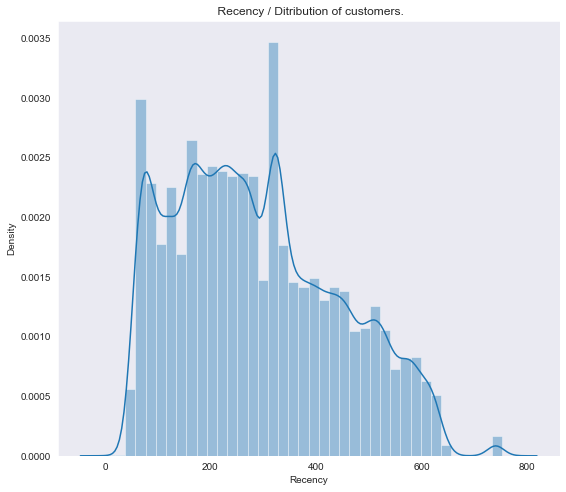

In [76]:
plt.figure(figsize=(9,8))
sns.distplot(recency['Recency'],bins = 40);
plt.xlabel('Recency')
plt.ylabel("Density")
plt.title(" Recency / Ditribution of customers.");




#### La normalit" des données:

In [77]:
import scipy.stats as kstest
import scipy.stats as st
# Effectuer le test de normalité de Kolmogorov-Smirnov
stat, p = st.kstest(recency['Recency'], 'norm')
stat, p

(0.9999791874791875, 0.0)

* p_value = 0 , inférieur donc a 0.05 , donc L'échantillon ne suit pas une distribution normale.

{'whiskers': [<matplotlib.lines.Line2D at 0x1cb7ad3ad90>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb7ad2d370>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb7ad3abe0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb7ad2d910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb7ad2dbe0>],
 'means': []}

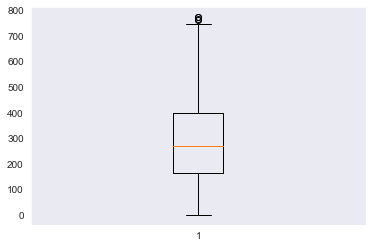

In [78]:
plt.boxplot(recency['Recency'])

##### 2-Calculez la fréquence en comptant le nombre de commandes par client :

In [79]:
frequency = customers_orders_payement.groupby(['customer_unique_id']).agg({'order_id': 'nunique'}).reset_index()
# Renomer la colonne  order_id paar Fequency:
frequency = frequency.rename(columns = {'order_id':'Frequency'})
#frequency

# Méthode  2:
# frequency1 = customers_orders_payement[['customer_unique_id', 'order_id']].copy()
# frequency1 = frequency1.groupby('customer_unique_id')['order_id'].count().reset_index()
# frequency1

* L a distributions des données:

In [80]:
frequency.describe()

,Frequency
count,96096.000000
mean,1.034809
std,0.214384
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,17.000000


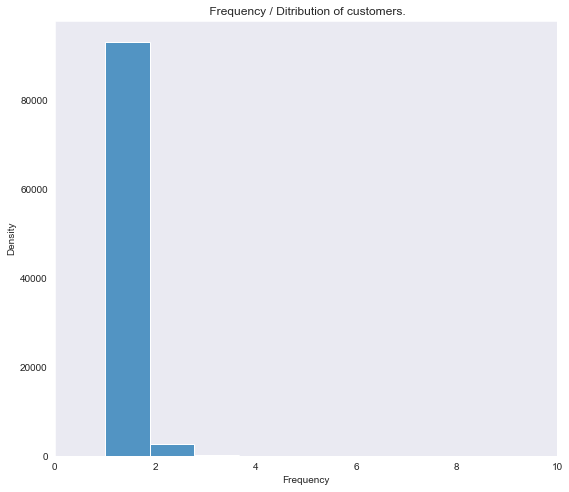

In [81]:
plt.figure(figsize=(9,8))
sns.histplot(frequency['Frequency']);
plt.xlim(0,10)
plt.xlabel('Frequency')
plt.ylabel("Density")
plt.title(" Frequency / Ditribution of customers.");




*  d'apres ce graphique , on vois que plus de 90% personne qui passe 1 seule commande.

In [82]:
# Effectuer le test de Shapiro-Wilk
stat, p = st.kstest(frequency['Frequency'],'norm')
stat , p

(0.8413447460685429, 0.0)

* minimiser les écart pour la fréquence

##### 3-Calculez le montant en summant le montant des commandes par client :

In [83]:
##Méthode 1 :
#monetary = customers_orders_payement.groupby('customer_unique_id')['payment_value'].sum().reset_index(name='monetary')
# Méthode 2 :
monteray  = customers_orders_payement.groupby(['customer_unique_id']).agg({'payment_value': 'sum'}).reset_index()
monteray = monteray.rename(columns = {'payment_value':'Monteray'})
#monteray

c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


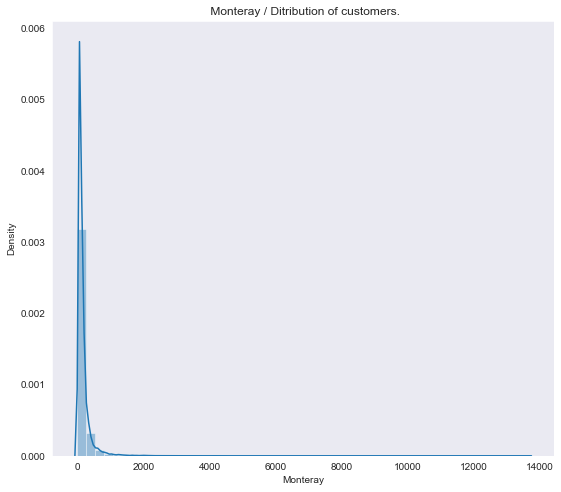

In [84]:
plt.figure(figsize=(9,8))
sns.distplot(monteray['Monteray']);

plt.xlabel('Monteray')
plt.ylabel("Density")
plt.title(" Monteray / Ditribution of customers.");




In [85]:
monteray.describe()

,Monteray
count,96096.000000
mean,166.592492
std,231.428332
min,0.000000
25%,63.120000
50%,108.000000
75%,183.530000
max,13664.080000


* Minimiser les écart au passage au log:

c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


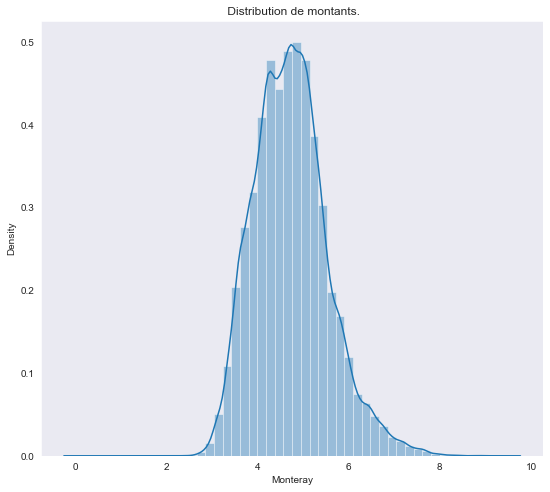

In [162]:
plt.figure(figsize=(9,8))
sns.distplot(np.log1p(monteray['Monteray']));

plt.xlabel('Monteray')
plt.ylabel("Density")
plt.title(" Distribution de montants.");


### etudier les valeurs abérantes atypique:


In [163]:
data_monteray_sup_2000 = monteray[monteray['Monteray'] > 2000]

c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


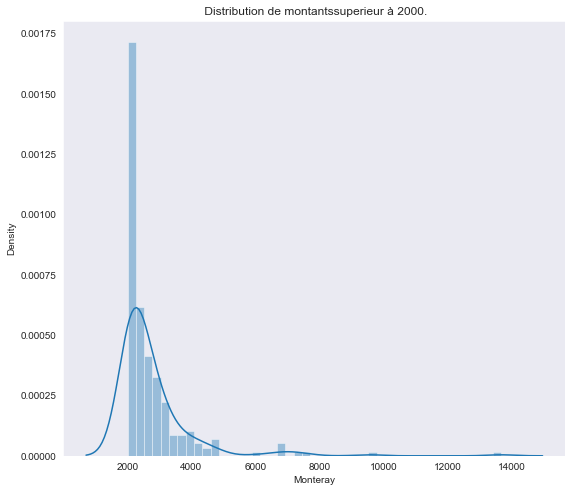

In [165]:
plt.figure(figsize=(9,8))
sns.distplot((data_monteray_sup_2000['Monteray']));

plt.xlabel('Monteray')
plt.ylabel("Density")
plt.title(" Distribution de montantssuperieur à 2000.");


In [87]:
#monteray = monteray[monteray['Monteray'] < 2000]

In [164]:
data_monteray_sup_2000.head()

,customer_unique_id,Monteray
262,00adeda9b742746c0c66e10d00ea1b74,2148.40
295,00c07da5ba0e07b4f248a3a373b07476,2304.68
426,011875f0176909c5cf0b14a9138bb691,4016.91
999,02b6ef845021b8fefe19c8d200f3ee06,2024.31
1046,02ccceb879088a0253e1e46e0200bdb8,2512.53


In [89]:
# data_cust_2000 = customers_orders_payement.merge(data_monteray_sup_2000,on  = 'customer_unique_id')
# data_cust_2000.head(8)

In [90]:
# data_cust_2000.groupby('customer_unique_id')['customer_id'].count().describe()

In [166]:
# Effectuer le test de Shapiro-Wilk
stat, p = st.kstest(monteray['Monteray'], 'norm');
stat , p

(0.9999687812187812, 0.0)

* Le passage des données au logarithme peut souvent aider à rendre la distribution des données plus symétrique et donc plus proche d'une distribution normale. Cela est dû au fait que le logarithme transforme les valeurs extrêmes en valeurs relativement plus petites, ce qui peut réduire l'effet de ces valeurs extrêmes sur la forme de la distribution.



* Il est également important de prendre en compte le contexte et l'objectif de l'analyse lors du choix de la transformation à appliquer aux données. Le passage au logarithme peut par exemple rendre les données plus facilement interprétables ou améliorer la qualité de certaines analyses statistiques.

## Merge  data(R, F, M):


In [92]:
# merge data on customer_unique_id:
df_RFM = pd.merge(recency,frequency,on="customer_unique_id")
data_RFM = pd.merge(df_RFM,monteray,on  = 'customer_unique_id')


In [93]:
data_RFM

,customer_unique_id,Recency,Frequency,Monteray
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,585,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89
...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,495,1,2067.42
96092,fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58
96093,ffff371b4d645b6ecea244b27531430a,617,1,112.46
96094,ffff5962728ec6157033ef9805bacc48,168,1,133.69


In [94]:
data_RFM.describe()

,Recency,Frequency,Monteray
count,96096.000000,96096.000000,96096.000000
mean,287.735691,1.034809,166.592492
std,153.414676,0.214384,231.428332
min,0.000000,1.000000,0.000000
25%,163.000000,1.000000,63.120000
50%,268.000000,1.000000,108.000000
75%,397.000000,1.000000,183.530000
max,772.000000,17.000000,13664.080000


In [95]:
data_RFM.to_csv("C:/Users/Lynda/Desktop/projet5/data_finale.csv",index = False)

## ```Dataframe  avec d'autre features:```
* on va creer un dataframe on basant sur id_unique de client, pour faire la segmentation et puis comparer avec dataframe RFM.

#### Dataframe olist_customers:
* dans ce dataframe la colonne trés interessantes est l'identifaint unique de clients,
on va crée un dataframe on basant sur cette colonne.

#### - Les commandes et clients:

In [96]:
order_df = olist_orders.merge(customers,on = 'customer_id',how = 'outer')
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [97]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   customer_unique_id             99441 non-null  object        
 9   customer_zip_code_prefix       99441 non-null  int64         
 10  customer_city                  99441 non-null  object        
 11  customer_state 

#### 1)- Calculer le temps de la livraison:

In [98]:
order_df['delivry_time'] =  (order_df['order_delivered_customer_date'] - order_df['order_purchase_timestamp']).dt.days
order_df['delivry_time'].describe()

count    96476.000000
mean        12.094086
std          9.551746
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivry_time, dtype: float64

c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivry_time', ylabel='Density'>

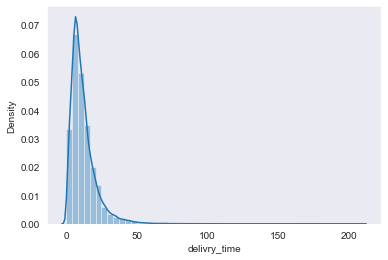

In [99]:
sns.distplot( order_df.delivry_time)

In [100]:
order_df.shape

(99441, 13)

### 2)- Délai de la livraison:

In [101]:
order_df['delivery_delay'] = (order_df['order_delivered_customer_date'] - order_df['order_estimated_delivery_date']).dt.days
order_df['delivery_delay'].describe()

count    96476.000000
mean       -11.876881
std         10.183854
min       -147.000000
25%        -17.000000
50%        -12.000000
75%         -7.000000
max        188.000000
Name: delivery_delay, dtype: float64

c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_delay', ylabel='Density'>

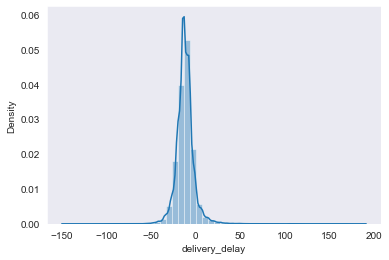

In [102]:
#order_df.shape
sns.distplot(order_df.delivery_delay )

In [103]:
order_df['order_delivered_customer_date'].isna().sum()

2965

In [104]:
# remplacer la date livrée date de client par 0 si nan et 1 si differents de 0.
order_df['delivered'] = order_df['order_delivered_customer_date'].notna().map({False: 0, True: 1})

### 3)- Status de la commande:

In [105]:
order_df['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [106]:
order_df[order_df['order_delivered_customer_date'].isna()]['order_status'].value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

In [107]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
delivry_time                     2965
delivery_delay                   2965
delivered                           0
dtype: int64

### 5)- Les détails de commandes:
* prix.
* articles.
* vendeurs,taille,poinds.

* on peut avoir plusieurs articles dans une seule commandes.

In [108]:
orderitems_df = order_items.merge(products,on = 'product_id',how = 'left')

# merge dataset orderitems_id avec sellers
orderitems_df = orderitems_df.merge(sellers,on = 'seller_id',how = 'left')

orderitems_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    112650 non-null  object        
 1   order_item_id               112650 non-null  int64         
 2   product_id                  112650 non-null  object        
 3   seller_id                   112650 non-null  object        
 4   shipping_limit_date         112650 non-null  datetime64[ns]
 5   price                       112650 non-null  float64       
 6   freight_value               112650 non-null  float64       
 7   product_category_name       111047 non-null  object        
 8   product_name_lenght         111047 non-null  float64       
 9   product_description_lenght  111047 non-null  float64       
 10  product_photos_qty          111047 non-null  float64       
 11  product_weight_g            112632 non-

#### compter le nombre d'article par commande:


In [109]:
order_df =order_df.merge(orderitems_df.groupby('order_id')['order_item_id'].count().rename('order_item_count').reset_index(),
                                on = 'order_id',how = 'left')
#order_df = order_df.merge(items_count,on = 'order_id',how = 'left')


In [110]:
order_df['order_item_count'].value_counts().sort_index()

1.0     88863
2.0      7516
3.0      1322
4.0       505
5.0       204
6.0       198
7.0        22
8.0         8
9.0         3
10.0        8
11.0        4
12.0        5
13.0        1
14.0        2
15.0        2
20.0        2
21.0        1
Name: order_item_count, dtype: int64

In [111]:
# compter les valeurs nulles:
order_df[order_df['order_item_count'].isna()]['order_status'].value_counts()

unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: order_status, dtype: int64

In [112]:
# remplacer les valeurs nulles on utilisant la méthode de fillna()
order_df['order_item_count'] = order_df['order_item_count'].fillna(1)

In [113]:
order_df['order_item_count'].describe(include = 'all')

count    99441.000000
mean         1.140626
std          0.536495
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         21.000000
Name: order_item_count, dtype: float64

c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='order_item_count', ylabel='Density'>

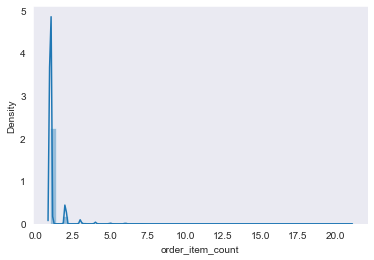

In [172]:
sns.distplot( order_df.order_item_count)

c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='order_item_count', ylabel='Density'>

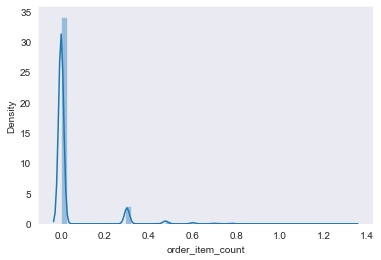

In [174]:
# Passage au log:
sns.distplot( np.log10(order_df.order_item_count))

### 5)- Compter les prix total d'une commande(cout de livraison et aussi le cout des articles achetés)

In [115]:
order_df = order_df.merge(orderitems_df.groupby('order_id')['price'].sum().rename('order_price').reset_index(),
                          on = 'order_id',how = 'left')

In [116]:
order_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivry_time,delivery_delay,delivered,order_item_count,order_price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,8.0,-8.0,1,1.0,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,13.0,-6.0,1,1.0,118.70


In [117]:
order_df = order_df.merge(orderitems_df.groupby('order_id')['freight_value'].sum().rename('order_freight').reset_index(),
                          on = 'order_id',how = 'left')

In [118]:
order_df['total_price'] = order_df['order_price'] + order_df['order_freight']

In [119]:
order_df[['order_price','order_freight','total_price',]].describe()

,order_price,order_freight,total_price
count,98666.000000,98666.000000,98666.000000
mean,137.754076,22.823562,160.577638
std,210.645145,21.650909,220.466087
min,0.850000,0.000000,9.590000
25%,45.900000,13.850000,61.980000
50%,86.900000,17.170000,105.290000
75%,149.900000,24.040000,176.870000
max,13440.000000,1794.960000,13664.080000


### faire la visualisation avec log et sans log: vue que la moyenne et le lmax sont trés eloignée.

#### 6)- ratio de dout de livraison/ prix:

In [120]:
# cout de livraison/ prix:
order_df['freight_ratio'] = order_df['order_freight'] /order_df['order_price']

In [121]:
order_df['freight_ratio'].describe()

count    98666.000000
mean         0.308389
std          0.314762
min          0.000000
25%          0.131864
50%          0.224374
75%          0.380191
max         21.447059
Name: freight_ratio, dtype: float64

### Faire la visualisation.

In [122]:
order_df = order_df.merge(geolocation_tab,left_on='customer_zip_code_prefix',right_on="geolocation_zip_code_prefix",how="left")
# order_df.drop(columns = ['geolocation_zip_code_prefix_x', 'geolocation_lat_x',
#        'geolocation_lng_x', 'geolocation_city_x', 'geolocation_state_x',
#        'geolocation_zip_code_prefix_y', 'geolocation_lat_y',
#        'geolocation_lng_y', 'geolocation_city_y', 'geolocation_state_y'],inplace = True,axis = 1)
order_df.head(4)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,order_item_count,order_price,order_freight,total_price,freight_ratio,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,29.99,8.72,38.71,0.290764,3149.0,-23.576983,-46.587161,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1.0,118.70,22.76,141.46,0.191744,47813.0,-12.177924,-44.660711,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,159.90,19.22,179.12,0.120200,75265.0,-16.745150,-48.514783,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,1.0,45.00,27.20,72.20,0.604444,59296.0,-5.774190,-35.271143,sao goncalo do amarante,RN


In [123]:
order_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'delivry_time', 'delivery_delay', 'delivered',
       'order_item_count', 'order_price', 'order_freight', 'total_price',
       'freight_ratio', 'geolocation_zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'geolocation_city', 'geolocation_state'],
      dtype='object')

In [124]:
order_df.duplicated(keep=False).sum()

0

### Catégories des produits:

In [125]:
orderitems_df['product_category_name'].describe()

count              111047
unique                 73
top       cama_mesa_banho
freq                11115
Name: product_category_name, dtype: object

In [126]:
set(orderitems_df['product_category_name'].unique()) - set(category['product_category_name'].unique())

{nan, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'}

In [127]:
# le nombre de catégory:
category['product_category_name_english'].nunique()

71

In [128]:
# les catégories présente dans dataset:
category['product_category_name_english'].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

### 8)- Le poids et la taille des produits:

In [129]:
order_df = order_df.merge(orderitems_df.groupby('order_id')['product_weight_g'].sum().rename("total_weight").reset_index(),
                          on = 'order_id',how = 'left')

In [130]:
order_df['total_weight'].describe()

count     98666.000000
mean       2390.027669
std        4773.239825
min           0.000000
25%         300.000000
50%         750.000000
75%        2066.750000
max      184400.000000
Name: total_weight, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1cb0b148070>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb0b1484f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb0b137d60>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb0b148a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb0b148d60>],
 'means': []}

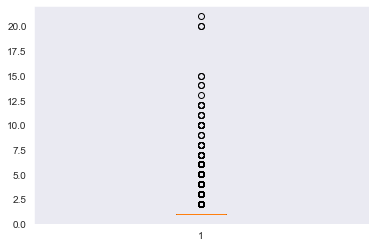

In [180]:
plt.boxplot(order_df.order_item_count)


### 9)- Calculer le volume de produits:

In [131]:
orderitems_df['volume_product'] = orderitems_df[['product_length_cm','product_height_cm','product_width_cm']].apply(lambda x:x[0]*x[1]*x[2],axis = 1)

orderitems_df['volume_product'].describe()

count    112632.000000
mean      15243.709567
std       23418.524686
min         168.000000
25%        2851.500000
50%        6480.000000
75%       18375.000000
max      296208.000000
Name: volume_product, dtype: float64

In [132]:
order_df = order_df.merge(orderitems_df.groupby('order_id')['volume_product'].sum().rename('total_volume').reset_index(),
                          on = 'order_id',how = 'left')

In [133]:
order_df['total_volume'].describe()

count    9.866600e+04
mean     1.740143e+04
std      3.040217e+04
min      0.000000e+00
25%      2.964000e+03
50%      7.260000e+03
75%      1.987200e+04
max      1.476000e+06
Name: total_volume, dtype: float64

### 10)- le nombre de paiements de chaque produits:

In [134]:
order_df = order_df.merge(order_payment.groupby('order_id')['payment_sequential'].count().rename('numbre_of_payment').reset_index(),
                          on = 'order_id',how = 'left')



In [135]:
order_df['numbre_of_payment'].value_counts()

1.0     96479
2.0      2382
3.0       301
4.0       108
5.0        52
6.0        36
7.0        28
8.0        11
9.0         9
12.0        8
11.0        8
10.0        5
13.0        3
15.0        2
19.0        2
14.0        2
22.0        1
29.0        1
21.0        1
26.0        1
Name: numbre_of_payment, dtype: int64

In [136]:
order_df['numbre_of_payment'].describe()

count    99440.000000
mean         1.044710
std          0.381166
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         29.000000
Name: numbre_of_payment, dtype: float64

In [137]:
order_df['numbre_of_payment'].isna().sum()

1

In [138]:
order_df = order_df.merge(order_payment.groupby('order_id')['payment_installments'].sum().rename('installment_total').reset_index(),
                        on = 'order_id',how = 'left' )


In [139]:
order_df['installment_total'].isna().sum()

1

In [140]:
order_df['installment_total'].value_counts().sort_index()

0.0         2
1.0     46264
2.0     13605
3.0     10709
4.0      7223
5.0      5295
6.0      3967
7.0      1689
8.0      4239
9.0       693
10.0     5224
11.0      129
12.0      146
13.0       29
14.0       23
15.0       80
16.0       26
17.0        9
18.0       28
19.0        3
20.0       29
21.0        5
22.0        2
23.0        1
24.0       16
25.0        2
26.0        1
29.0        1
Name: installment_total, dtype: int64

In [141]:
# remplacer les valeurs nulles:
order_df['numbre_of_payment'] = order_df['numbre_of_payment'].fillna(1)
# remplacer les valeurs null et les 0:
order_df.loc[order_df['installment_total'].isna()|order_df['installment_total']==0,'installment_total'] = 1

In [142]:
order_df['installment_total'].value_counts().sort_index()

1.0     46266
2.0     13605
3.0     10709
4.0      7223
5.0      5295
6.0      3967
7.0      1689
8.0      4239
9.0       693
10.0     5224
11.0      129
12.0      146
13.0       29
14.0       23
15.0       80
16.0       26
17.0        9
18.0       28
19.0        3
20.0       29
21.0        5
22.0        2
23.0        1
24.0       16
25.0        2
26.0        1
29.0        1
Name: installment_total, dtype: int64

In [143]:
order_df['installment_total'].describe()

count    99440.000000
mean         2.980943
std          2.741792
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         29.000000
Name: installment_total, dtype: float64

# Type de payement: 


In [144]:
order_payment['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

<AxesSubplot:xlabel='payment_type', ylabel='count'>

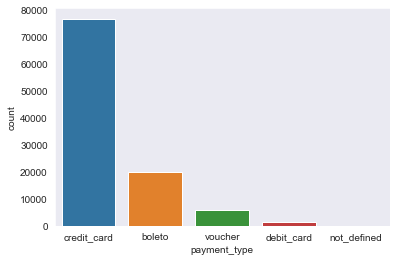

In [145]:
sns.countplot(data= order_payment , x= order_payment['payment_type'])

### Review commande:

In [146]:
order_review['review_title'] = (~order_review['review_comment_title'].isna())
order_review['review_message'] = (~order_review['review_comment_message'].isna())

In [147]:
data_review = order_review.groupby('order_id').agg({

                'review_id':'count',
                'review_score':'mean',
                'review_title':'mean',
                'review_message':'mean',
                'review_answer_timestamp':'mean'
})


data_review = data_review.reset_index()

In [148]:
data_review.head(2)

,order_id,review_id,review_score,review_title,review_message,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,5.0,0.0,1.0,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,4.0,0.0,0.0,2017-05-15 11:34:13


In [149]:
order_df = pd.merge(order_df , data_review,on = 'order_id',how = 'left')

In [150]:
order_df[['review_score','review_title','review_message','review_id','review_answer_timestamp']].describe()

,review_score,review_title,review_message,review_id
count,98673.000000,98673.000000,98673.000000,98673.000000
mean,4.086793,0.117063,0.413321,1.005584
std,1.346274,0.321482,0.492162,0.075060
min,1.000000,0.000000,0.000000,1.000000
25%,4.000000,0.000000,0.000000,1.000000
50%,5.000000,0.000000,0.000000,1.000000
75%,5.000000,0.000000,1.000000,1.000000
max,5.000000,1.000000,1.000000,3.000000


In [151]:
order_df['review_score'].isna().sum()

768

In [152]:
order_df['review_score'].value_counts().sort_index()

1.000000    11316
1.500000        8
2.000000     3125
2.500000       34
3.000000     8136
3.333333        1
3.500000       25
4.000000    19018
4.333333        1
4.500000       54
5.000000    56955
Name: review_score, dtype: int64

In [153]:
order_df['review_score'].mean()

4.0867934152875325

In [154]:

order_df['review_id'].value_counts()



1.0    98126
2.0      543
3.0        4
Name: review_id, dtype: int64

In [155]:
# impultation des valeurs manquantes:
order_df['review_score'] = order_df['review_score'].fillna(4)# " je complete par 4 parceque la moyenne est 4
order_df['review_id']    = order_df['review_id'].fillna(1)
order_df['review_message'] = order_df['review_message'].fillna(False).astype(bool)
order_df['review_title'] = order_df['review_title'].fillna(False).astype(bool)

<AxesSubplot:xlabel='review_score', ylabel='Count'>

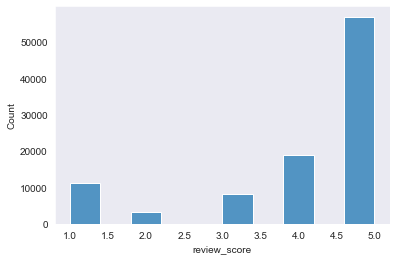

In [156]:
sns.histplot(data = data_review , x = 'review_score',bins =10)

In [157]:
order_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'delivry_time', 'delivery_delay', 'delivered',
       'order_item_count', 'order_price', 'order_freight', 'total_price',
       'freight_ratio', 'geolocation_zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'geolocation_city', 'geolocation_state',
       'total_weight', 'total_volume', 'numbre_of_payment',
       'installment_total', 'review_id', 'review_score', 'review_title',
       'review_message', 'review_answer_timestamp'],
      dtype='object')

#### Impultation des données manquantes:

In [159]:
# Completer les valeur manquantes par la moyenne:
order_df.loc[(order_df["geolocation_lat"].isna()),"geolocation_lat"]=order_df["geolocation_lat"].mean()
order_df.loc[(order_df["geolocation_lng"].isna()),"geolocation_lng"]=order_df["geolocation_lng"].mean()
order_df.loc[(order_df["total_price"].isna()),"total_price"]=order_df["total_price"].mean()
order_df.loc[(order_df["freight_ratio"].isna()),"freight_ratio"]=order_df["freight_ratio"].mean()
order_df.loc[(order_df["delivry_time"].isna()),"delivry_time"]=order_df["delivry_time"].mean()
order_df.loc[(order_df["delivery_delay"].isna()),"delivery_delay"]=order_df["delivery_delay"].mean()
order_df.loc[(order_df["order_freight"].isna()),"order_freight"]=order_df["order_freight"].mean()
order_df.loc[(order_df["total_price"].isna()),"total_price"]=order_df["total_price"].mean()
order_df.loc[(order_df['total_weight'].isna()),'total_weight']=order_df['total_weight'].mean()
order_df.loc[(order_df['total_volume'].isna()),'total_volume']=order_df['total_volume'].mean()




In [ ]:
data_cust = data_RFM.merge(order_df,on = 'customer_unique_id',how = 'left')
data_cust

In [161]:
data_cust.to_csv('C:/Users/Lynda/Desktop/projet5/df_final.csv')